In [247]:
import pandas as pd
import seaborn as sns
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

Amazon Stock Analysis

In [248]:
#Read the Data From Yahoo Finance Website directly
amzn1= yf.Ticker("amzn")
amzn = amzn1.history(start="2021-09-04", end="2022-09-04", interval="1d")
#Perform Cleaning
amzn.isnull().sum()                               
amzn.dropna(inplace = True, axis = 0)

amzn.dtypes


Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits    float64
dtype: object

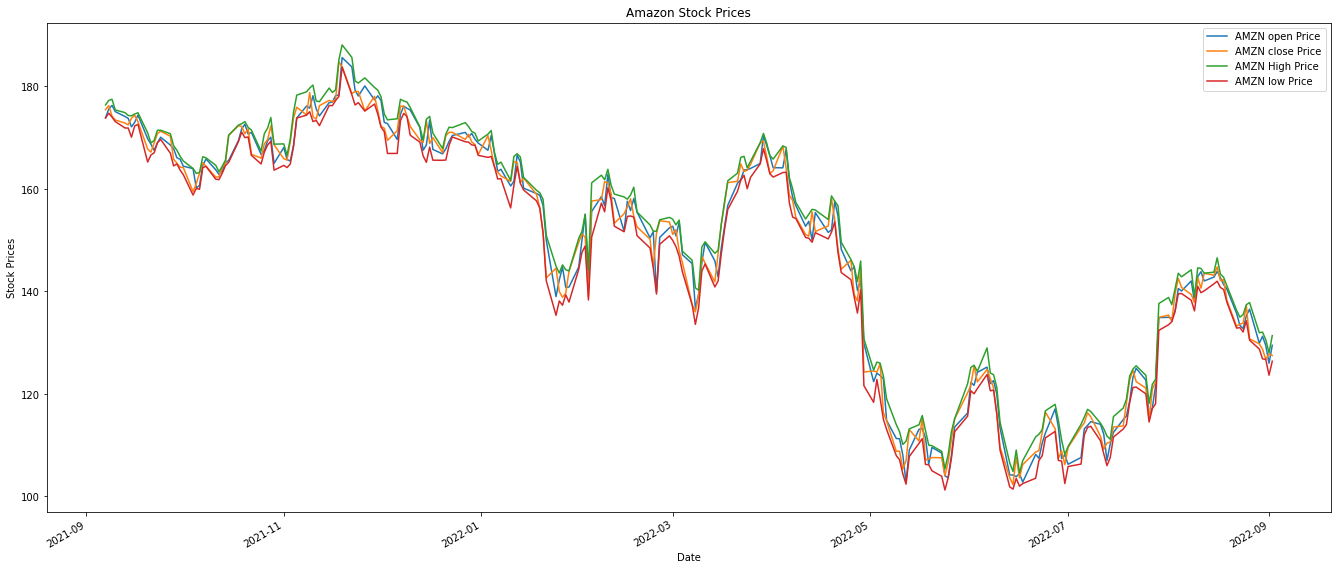

In [10]:
#Change in Stock price Overtime Visualization
amzn["Open"].plot(label= "AMZN open Price", figsize = (23,10))
amzn["Close"].plot(label= "AMZN close Price")
amzn["High"].plot(label= "AMZN High Price")
amzn["Low"].plot(label= "AMZN low Price")
plt.legend()
plt.title('Amazon Stock Prices')
plt.ylabel('Stock Prices')
plt.show()

Text(0, 0.5, 'Volume')

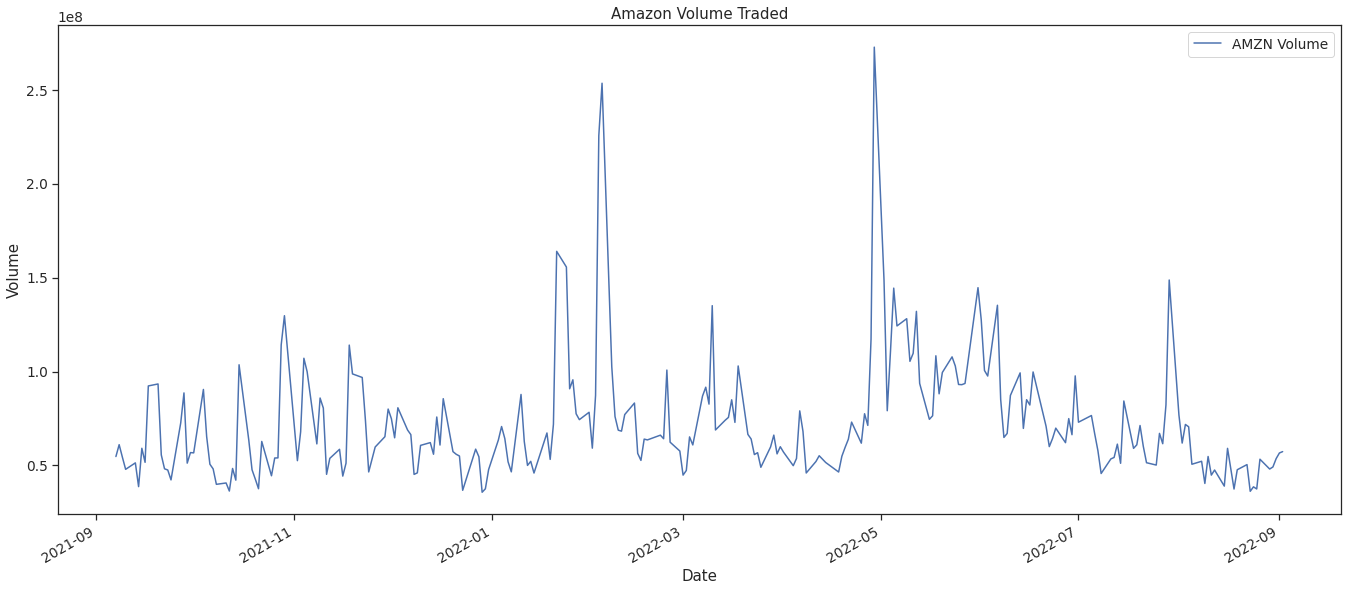

In [253]:
#Visualization of Change in a Stock's Volume being traded, Overtime
amzn['Volume'].plot(label= "AMZN Volume", figsize= (23,10))
plt.title("Amazon Volume Traded")
plt.legend()
plt.ylabel('Volume')

Text(0.5, 1.0, 'Moving Average')

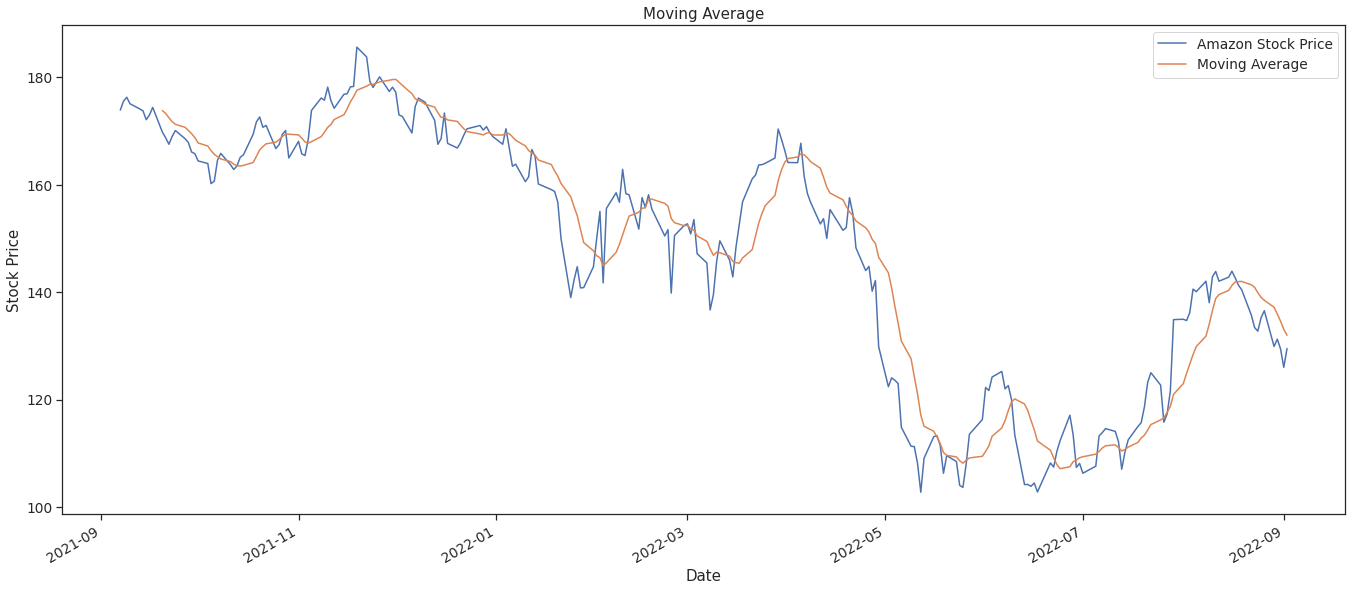

In [252]:
#Moving Average of a stock
amzn['Open'].plot(label="Amazon Stock Price", figsize=(23,10))
amzn['ma50']=amzn["Open"].rolling(10).mean()
amzn['ma50'].plot(label='Moving Average')
plt.legend()
plt.ylabel('Stock Price')
plt.title('Moving Average')

In [254]:
#The Daily Return Average of a stock
amzn['Return'] = (amzn['Close']/amzn['Close'].shift(1))-1
#Data Cleaning
amzn.dropna(axis = 0, inplace = True)
amzn


,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma50,Return
Date,,,,,,,,,
2021-09-20,169.800003,170.949997,165.250504,167.786499,93382000,0,0.0,173.813701,-0.030842
2021-09-21,168.750000,168.985001,166.619507,167.181503,55618000,0,0.0,173.298701,-0.003606
2021-09-22,167.550003,169.449997,167.052505,169.002502,48228000,0,0.0,172.495451,0.010892
2021-09-23,169.002502,171.447998,169.002502,170.800003,47588000,0,0.0,171.765602,0.010636
2021-09-24,170.100494,171.462997,169.669998,171.276001,42324000,0,0.0,171.266501,0.002787
...,...,...,...,...,...,...,...,...,...
2022-08-29,129.899994,131.949997,128.770004,129.789993,48101600,0,0.0,137.198001,-0.007342
2022-08-30,131.250000,132.070007,126.849998,128.729996,49203000,0,0.0,135.932001,-0.008167
2022-08-31,129.449997,130.589996,126.739998,126.769997,53648700,0,0.0,134.608000,-0.015226


Text(0, 0.5, 'Return')

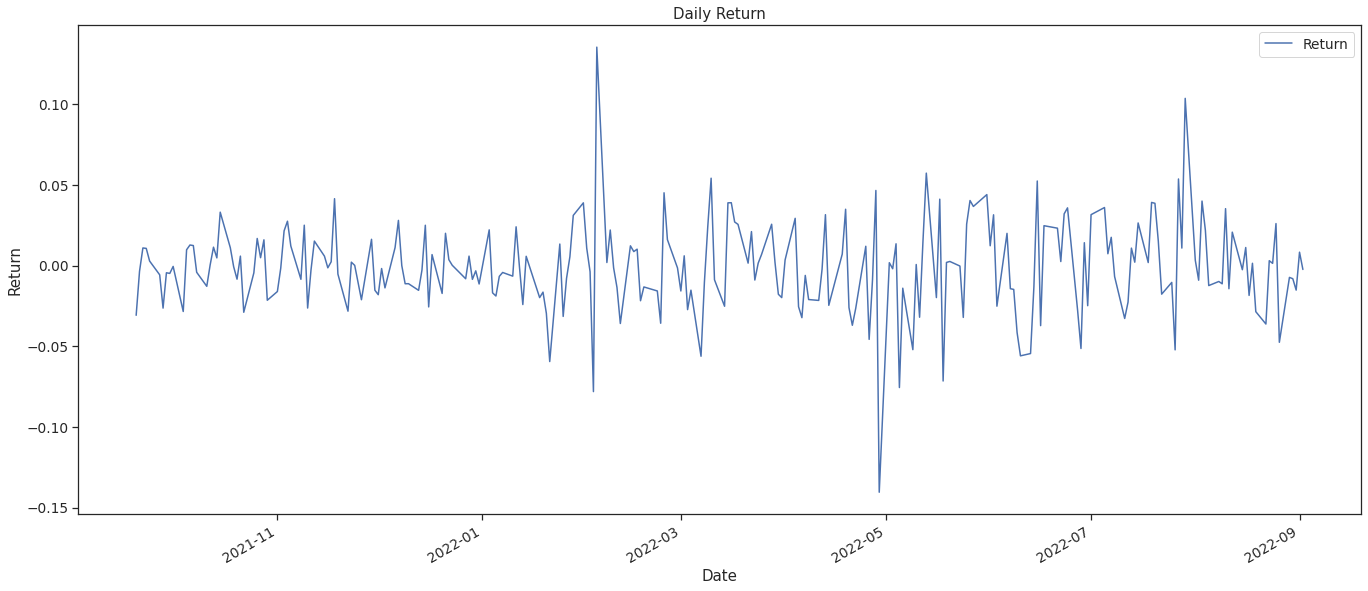

In [257]:
#ploting daily Return
amzn['Return'].plot(label='Return', figsize=(23,10))
plt.legend()
plt.title('Daily Return')
plt.ylabel('Return')

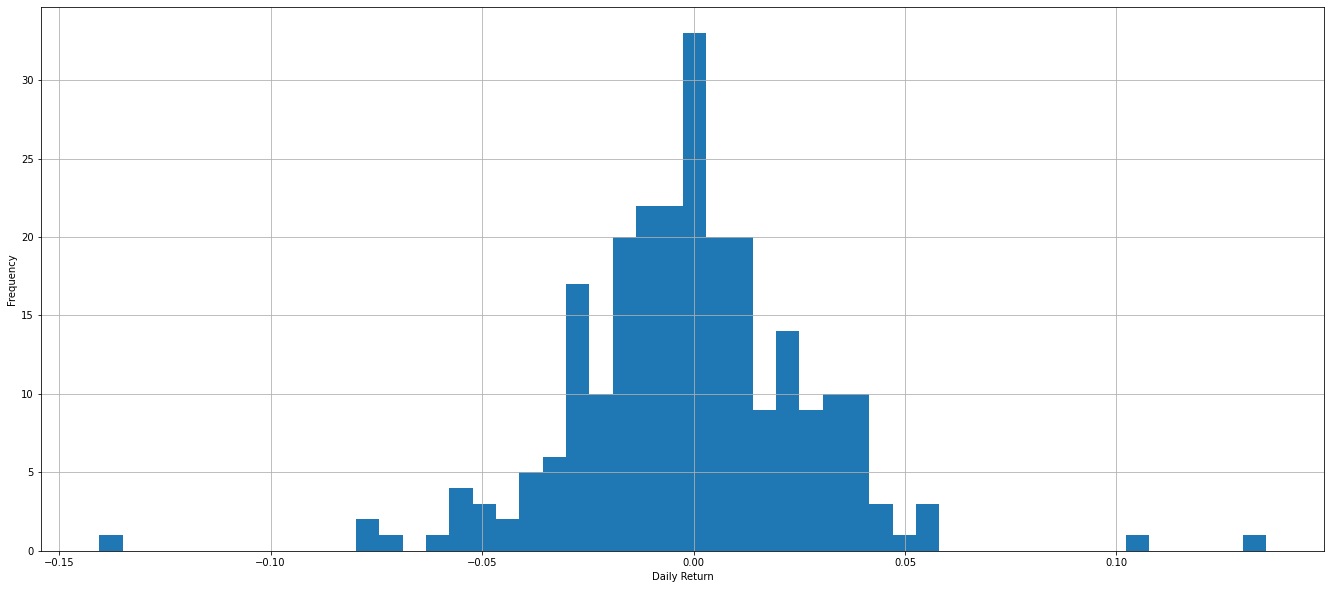

In [84]:
#Daily Return in Histogram
amzn['Return'].hist(bins = 50, figsize = (23,10)) 
plt.xlabel("Daily Return")
plt.ylabel('Frequency')
plt.show()

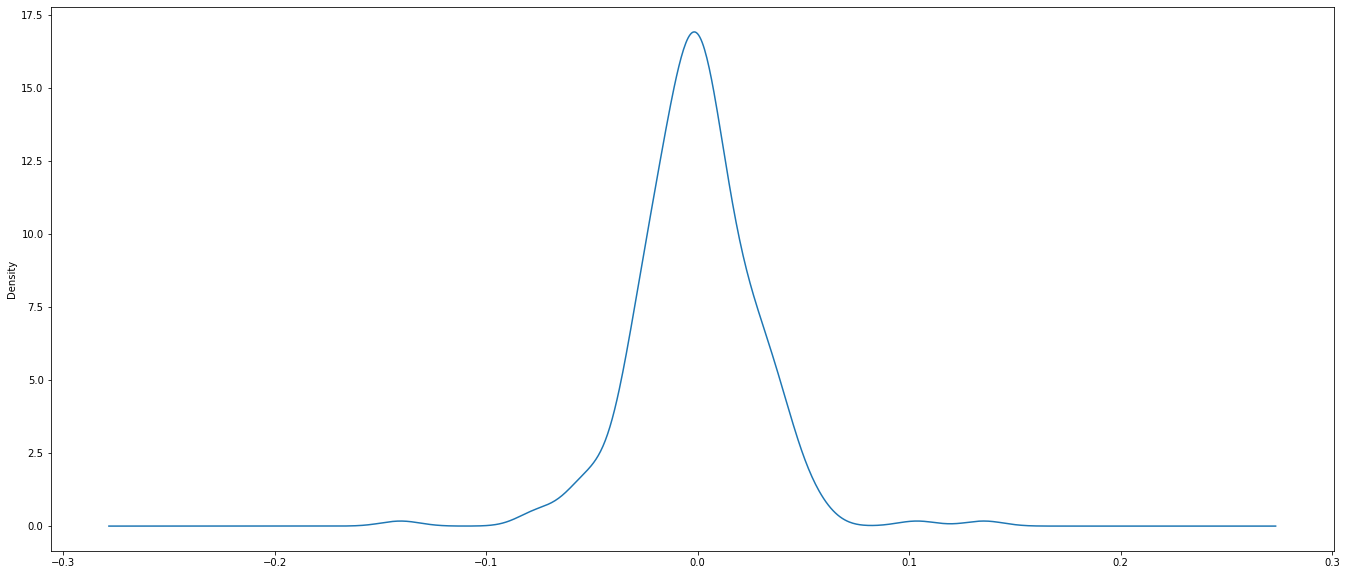

In [85]:
 #plotting in Kernel density Estimation 
 amzn['Return'].plot(kind='kde', label= "Amazon", figsize= (23,10))

In [158]:
#Trend Analysis
df = pd.DataFrame(amzn,columns = ['Return'])
minvalue_series = df.min()

minvalue_series


Return   -0.140494
dtype: float64

In [159]:
df = pd.DataFrame(amzn,columns = ['Return'])
maxvalue_series = df.max()

maxvalue_series



Return    0.135359
dtype: float64

In [155]:
def trend(x):
  if x > -0.150 and x <= 0:
    return 'Negative'
  
  elif x > 0 and x <= 3:
    return 'Postive'
  
  



In [156]:
amzn['Trend']= np.zeros(amzn['Return'].count())
amzn['Trend']= amzn['Return'].apply(lambda x:trend(x))
amzn


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Trend
Date,,,,,,,,,
2021-09-08,175.582504,177.281494,174.783493,176.274994,61068000,0,0.0,0.004619,Postive
2021-09-09,176.300995,177.499496,174.018494,174.207993,54384000,0,0.0,-0.011726,Negative
2021-09-10,175.091507,175.422501,173.145493,173.457504,47946000,0,0.0,-0.004308,Negative
2021-09-13,174.139999,174.897995,171.899994,172.858505,51380000,0,0.0,-0.003453,Negative
2021-09-14,173.777496,174.340500,171.885498,172.500000,38738000,0,0.0,-0.002074,Negative
...,...,...,...,...,...,...,...,...,...
2022-08-29,129.899994,131.949997,128.770004,129.789993,48101600,0,0.0,-0.007342,Negative
2022-08-30,131.250000,132.070007,126.849998,128.729996,49203000,0,0.0,-0.008167,Negative
2022-08-31,129.449997,130.589996,126.739998,126.769997,53648700,0,0.0,-0.015226,Negative


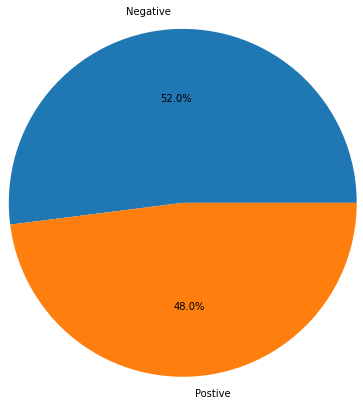

In [157]:
amzn_pie= amzn.groupby('Trend')
pie_label = sorted([i for i in amzn.loc[:, 'Trend'].unique()])
plt.pie(amzn_pie['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

MULTIPLE TICKERS ANALYSIS


In [216]:
import yfinance as yf
data = yf.Tickers("MSFT, GOOG ,AMZN, AAPL")
data_hist = data.history(start="2021-09-04", end="2022-09-04", interval="1d")
data_hist

[*********************100%***********************]  4 of 4 completed


Close                                     Dividends       \
                  AAPL        AMZN        GOOG        MSFT      AAPL AMZN   
Date                                                                        
2021-09-07  155.816879  175.464493  145.518997  297.686829       0.0    0   
2021-09-08  154.245667  176.274994  144.883499  297.716583       0.0    0   
2021-09-09  153.211472  174.207993  144.913498  294.781219       0.0    0   
2021-09-10  148.139893  173.457504  141.921005  293.253967       0.0    0   
2021-09-13  148.716660  172.858505  143.464996  294.523346       0.0    0   
...                ...         ...         ...         ...       ...  ...   
2022-08-29  161.380005  129.789993  110.339996  265.230011       0.0    0   
2022-08-30  158.910004  128.729996  109.910004  262.970001       0.0    0   
2022-08-31  157.220001  126.769997  109.150002  261.470001       0.0    0   
2022-09-01  157.960007  127.820000  110.550003  260.399994       0.0    0   
2022-09-02  155.809998  127.510002  108.680000  256.059998       0.0    0   

                            High              ...        Open              \
           GOOG MSFT        AAPL        AMZN  ...        GOOG        MSFT   
Date                                          ...                           
2021-09-07    0  0.0  156.383695  176.404495  ...  144.749496  298.509952   
2021-09-08    0  0.0  156.164904  177.281494  ...  145.393494  297.290162   
2021-09-09    0  0.0  155.240097  177.499496  ...  144.883499  298.321576   
2021-09-10    0  0.0  154.613611  175.422501  ...  145.443497  295.941481   
2021-09-13    0  0.0  150.576234  174.897995  ...  143.201004  295.078692   
...         ...  ...         ...         ...  ...         ...         ...   
2022-08-29    0  0.0  162.899994  131.949997  ...  110.779999  265.850006   
2022-08-30    0  0.0  162.559998  132.070007  ...  111.029999  266.670013   
2022-08-31    0  0.0  160.580002  130.589996  ...  111.629997  265.390015   
2022-09-01    0  0.0  158.419998  128.020004  ...  109.199997  258.869995   
2022-09-02    0  0.0  160.360001  131.380005  ...  111.339996  261.700012   

           Stock Splits                    Volume                      \
                   AAPL AMZN GOOG MSFT       AAPL      AMZN      GOOG   
Date                                                                    
2021-09-07            0  0.0  0.0    0   82278300  54758000  15170000   
2021-09-08            0  0.0  0.0    0   74420200  61068000  15486000   
2021-09-09            0  0.0  0.0    0   57305700  54384000  14798000   
2021-09-10            0  0.0  0.0    0  140893200  47946000  32896000   
2021-09-13            0  0.0  0.0    0  102404300  51380000  20176000   
...                 ...  ...  ...  ...        ...       ...       ...   
2022-08-29            0  0.0  0.0    0   73314000  48101600  20386100   
2022-08-30            0  0.0  0.0    0   77906200  49203000  20548200   
2022-08-31            0  0.0  0.0    0   87991100  53648700  25898000   
2022-09-01            0  0.0  0.0    0   74229900  56636100  22784400   
2022-09-02            0  0.0  0.0    0   76905200  57378500  20618080   

                      
                MSFT  
Date                  
2021-09-07  17180400  
2021-09-08  15046800  
2021-09-09  19927000  
2021-09-10  19633400  
2021-09-13  23652900  
...              ...  
2022-08-29  20338500  
2022-08-30  22767100  
2022-08-31  24791800  
2022-09-01  23263400  
2022-09-02  22841600  

[251 rows x 28 columns]

Text(0, 0.5, 'Stock Prices')

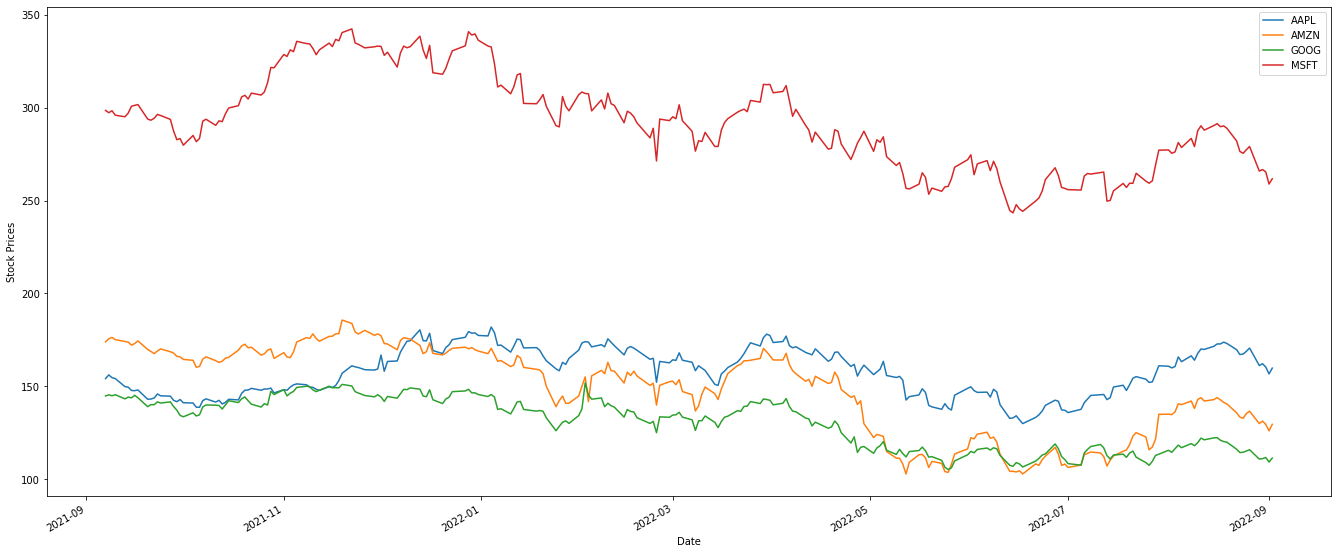

In [220]:
data_hist['Open'].plot(figsize=(23,10))
plt.ylabel('Stock Prices')

Text(0, 0.5, 'Volume Traded')

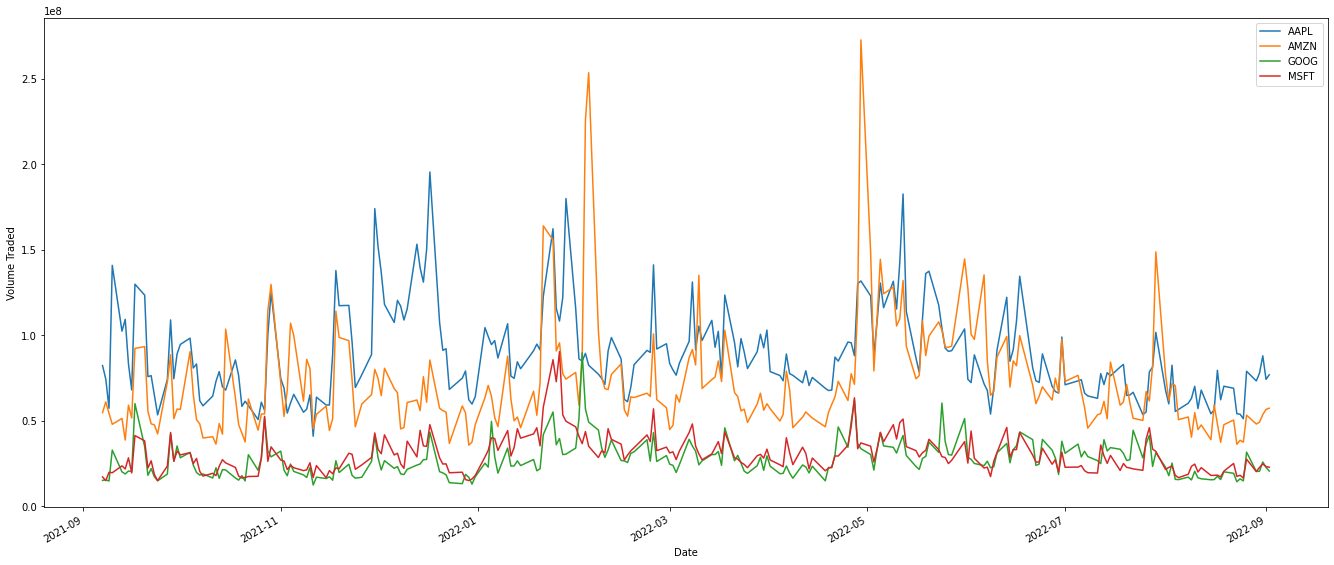

In [236]:
data_hist['Volume'].plot(figsize=(23,10))
plt.ylabel('Volume Traded')

In [235]:
amzn.iloc[[amzn['Volume'].argmax()]]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return,Trend
Date,,,,,,,,,
2022-04-29,129.848999,130.761002,121.625,124.281502,272662000,0,0.0,-0.140494,Negative


In [238]:

data_hist.dropna(inplace = True, axis = 0)

data_hist

Close                                     Dividends       \
                  AAPL        AMZN        GOOG        MSFT      AAPL AMZN   
Date                                                                        
2021-09-07  155.816879  175.464493  145.518997  297.686829       0.0    0   
2021-09-08  154.245667  176.274994  144.883499  297.716583       0.0    0   
2021-09-09  153.211472  174.207993  144.913498  294.781219       0.0    0   
2021-09-10  148.139893  173.457504  141.921005  293.253967       0.0    0   
2021-09-13  148.716660  172.858505  143.464996  294.523346       0.0    0   
...                ...         ...         ...         ...       ...  ...   
2022-08-29  161.380005  129.789993  110.339996  265.230011       0.0    0   
2022-08-30  158.910004  128.729996  109.910004  262.970001       0.0    0   
2022-08-31  157.220001  126.769997  109.150002  261.470001       0.0    0   
2022-09-01  157.960007  127.820000  110.550003  260.399994       0.0    0   
2022-09-02  155.809998  127.510002  108.680000  256.059998       0.0    0   

                            High              ...        Open              \
           GOOG MSFT        AAPL        AMZN  ...        GOOG        MSFT   
Date                                          ...                           
2021-09-07    0  0.0  156.383695  176.404495  ...  144.749496  298.509952   
2021-09-08    0  0.0  156.164904  177.281494  ...  145.393494  297.290162   
2021-09-09    0  0.0  155.240097  177.499496  ...  144.883499  298.321576   
2021-09-10    0  0.0  154.613611  175.422501  ...  145.443497  295.941481   
2021-09-13    0  0.0  150.576234  174.897995  ...  143.201004  295.078692   
...         ...  ...         ...         ...  ...         ...         ...   
2022-08-29    0  0.0  162.899994  131.949997  ...  110.779999  265.850006   
2022-08-30    0  0.0  162.559998  132.070007  ...  111.029999  266.670013   
2022-08-31    0  0.0  160.580002  130.589996  ...  111.629997  265.390015   
2022-09-01    0  0.0  158.419998  128.020004  ...  109.199997  258.869995   
2022-09-02    0  0.0  160.360001  131.380005  ...  111.339996  261.700012   

           Stock Splits                    Volume                      \
                   AAPL AMZN GOOG MSFT       AAPL      AMZN      GOOG   
Date                                                                    
2021-09-07            0  0.0  0.0    0   82278300  54758000  15170000   
2021-09-08            0  0.0  0.0    0   74420200  61068000  15486000   
2021-09-09            0  0.0  0.0    0   57305700  54384000  14798000   
2021-09-10            0  0.0  0.0    0  140893200  47946000  32896000   
2021-09-13            0  0.0  0.0    0  102404300  51380000  20176000   
...                 ...  ...  ...  ...        ...       ...       ...   
2022-08-29            0  0.0  0.0    0   73314000  48101600  20386100   
2022-08-30            0  0.0  0.0    0   77906200  49203000  20548200   
2022-08-31            0  0.0  0.0    0   87991100  53648700  25898000   
2022-09-01            0  0.0  0.0    0   74229900  56636100  22784400   
2022-09-02            0  0.0  0.0    0   76905200  57378500  20618080   

                      
                MSFT  
Date                  
2021-09-07  17180400  
2021-09-08  15046800  
2021-09-09  19927000  
2021-09-10  19633400  
2021-09-13  23652900  
...              ...  
2022-08-29  20338500  
2022-08-30  22767100  
2022-08-31  24791800  
2022-09-01  23263400  
2022-09-02  22841600  

[251 rows x 28 columns]

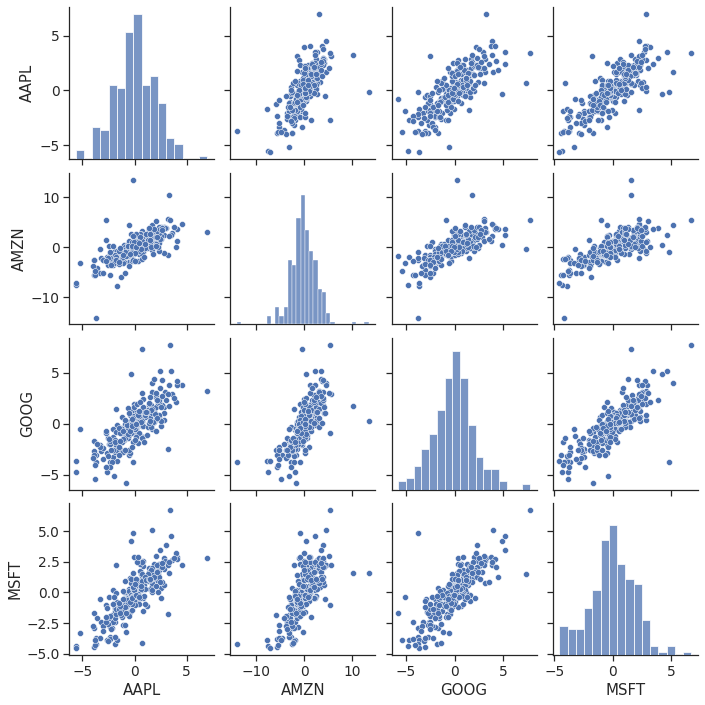

In [245]:
 
daily_return = data_hist['Close'].pct_change()*100

 
import seaborn as sns
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(daily_return)

In [261]:
aapl1=yf.Ticker("AAPL")
aapl = aapl1.history(start="2021-09-04", end="2022-09-04", interval="1d")
msft1=yf.Ticker('MSFT')
msft = msft1.history(start="2021-09-04", end="2022-09-04", interval="1d")
goog1=yf.Ticker('GOOG')
goog = goog1.history(start="2021-09-04", end="2022-09-04", interval="1d")

Text(0.5, 1.0, 'Stock Prices of Diffrent Companies')

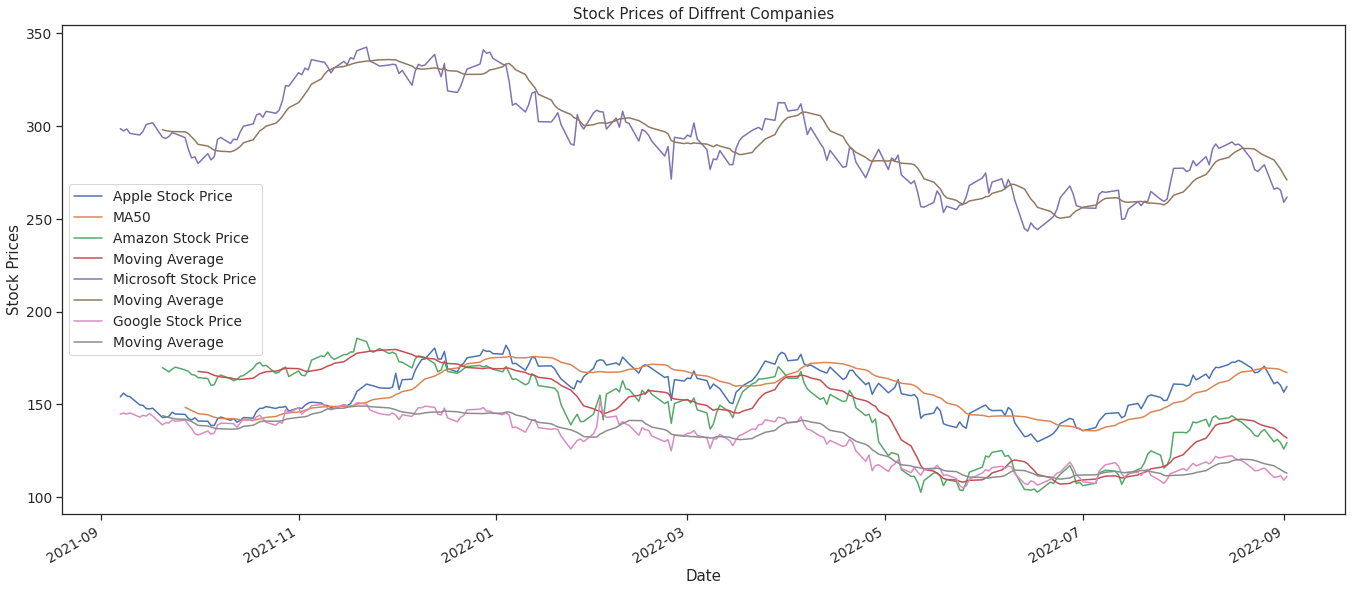

In [273]:
aapl['Open'].plot(label= 'Apple Stock Price', figsize=(23,10))
appl=aapl
aapl['MA50'] = aapl['Open'].rolling(15).mean() 
aapl['MA50'].plot(figsize=(23,10))
amzn['Open'].plot(label="Amazon Stock Price", figsize=(23,10))
amzn['ma50']=amzn["Open"].rolling(10).mean()
amzn['ma50'].plot(label='Moving Average')
msft['Open'].plot(label="Microsoft Stock Price", figsize=(23,10))
msft['ma50']=msft["Open"].rolling(10).mean()
msft['ma50'].plot(label='Moving Average')
goog['Open'].plot(label="Google Stock Price", figsize=(23,10))
goog['ma50']=goog["Open"].rolling(10).mean()
goog['ma50'].plot(label='Moving Average')
plt.legend()
plt.ylabel('Stock Prices')
plt.title('Stock Prices of Diffrent Companies')

In [275]:
#The Daily Return Average of a stock
goog['Return'] = (goog['Close']/goog['Close'].shift(1))-1
#Data Cleaning
goog.dropna(axis = 0, inplace = True)
goog


,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma50,Return
Date,,,,,,,,,
2021-09-20,139.000198,139.362503,137.052994,139.016998,34918000,0,0.0,143.951068,-0.017294
2021-09-21,140.117004,140.811600,138.905502,139.646500,18130000,0,0.0,143.487819,0.004528
2021-09-22,140.050507,141.583496,139.471756,140.938507,22068000,0,0.0,142.953520,0.009252
2021-09-23,141.609497,142.252457,141.096497,141.826508,17272000,0,0.0,142.626120,0.006301
2021-09-24,140.945999,142.903503,140.850494,142.632996,14950000,0,0.0,142.176370,0.005686
...,...,...,...,...,...,...,...,...,...
2022-08-29,110.779999,111.959999,109.809998,110.339996,20386100,0,0.0,116.996000,-0.008625
2022-08-30,111.029999,111.370003,108.800003,109.910004,20548200,0,0.0,115.867000,-0.003897
2022-08-31,111.629997,111.769997,109.050003,109.150002,25898000,0,0.0,114.937000,-0.006915


In [276]:
#The Daily Return Average of a stock
msft['Return'] = (msft['Close']/msft['Close'].shift(1))-1
#Data Cleaning
msft.dropna(axis = 0, inplace = True)
msft


,Open,High,Low,Close,Volume,Dividends,Stock Splits,ma50,Return
Date,,,,,,,,,
2021-09-20,293.868821,296.238985,287.115384,291.855682,38278700,0.0,0,297.970494,-0.018575
2021-09-21,293.234185,295.068826,291.627645,292.351562,22364100,0.0,0,297.442914,0.001699
2021-09-22,294.265548,297.726552,292.063985,296.100159,26626300,0.0,0,297.140449,0.012822
2021-09-23,296.367927,298.400889,295.058883,297.072021,18604600,0.0,0,296.945088,0.003282
2021-09-24,295.753076,297.310014,294.463855,296.863770,14999000,0.0,0,296.926244,-0.000701
...,...,...,...,...,...,...,...,...,...
2022-08-29,265.850006,267.399994,263.850006,265.230011,20338500,0.0,0,281.639148,-0.010668
2022-08-30,266.670013,267.049988,260.660004,262.970001,22767100,0.0,0,279.168997,-0.008521
2022-08-31,265.390015,267.109985,261.329987,261.470001,24791800,0.0,0,276.734000,-0.005704


In [277]:
#The Daily Return Average of a stock
aapl['Return'] = (aapl['Close']/aapl['Close'].shift(1))-1
#Data Cleaning
aapl.dropna(axis = 0, inplace = True)
aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA50,Return
Date,,,,,,,,,
2021-09-27,144.659385,145.146660,143.018586,144.559937,74150700,0.0,0,148.448162,-0.010550
2021-09-28,142.451777,143.943419,140.900472,141.119247,108972300,0.0,0,147.671182,-0.023801
2021-09-29,141.676109,143.645071,141.238558,142.034103,74602000,0.0,0,146.709240,0.006483
2021-09-30,142.859500,143.575489,140.492757,140.711533,89056700,0.0,0,145.924969,-0.009312
2021-10-01,141.109282,142.123602,138.334835,141.855103,94639600,0.0,0,145.056502,0.008127
...,...,...,...,...,...,...,...,...,...
2022-08-29,161.149994,162.899994,159.820007,161.380005,73314000,0.0,0,169.334668,-0.013690
2022-08-30,162.130005,162.559998,157.720001,158.910004,77906200,0.0,0,169.208668,-0.015305
2022-08-31,160.309998,160.580002,157.139999,157.220001,87991100,0.0,0,168.717335,-0.010635


Text(0, 0.5, 'Return')

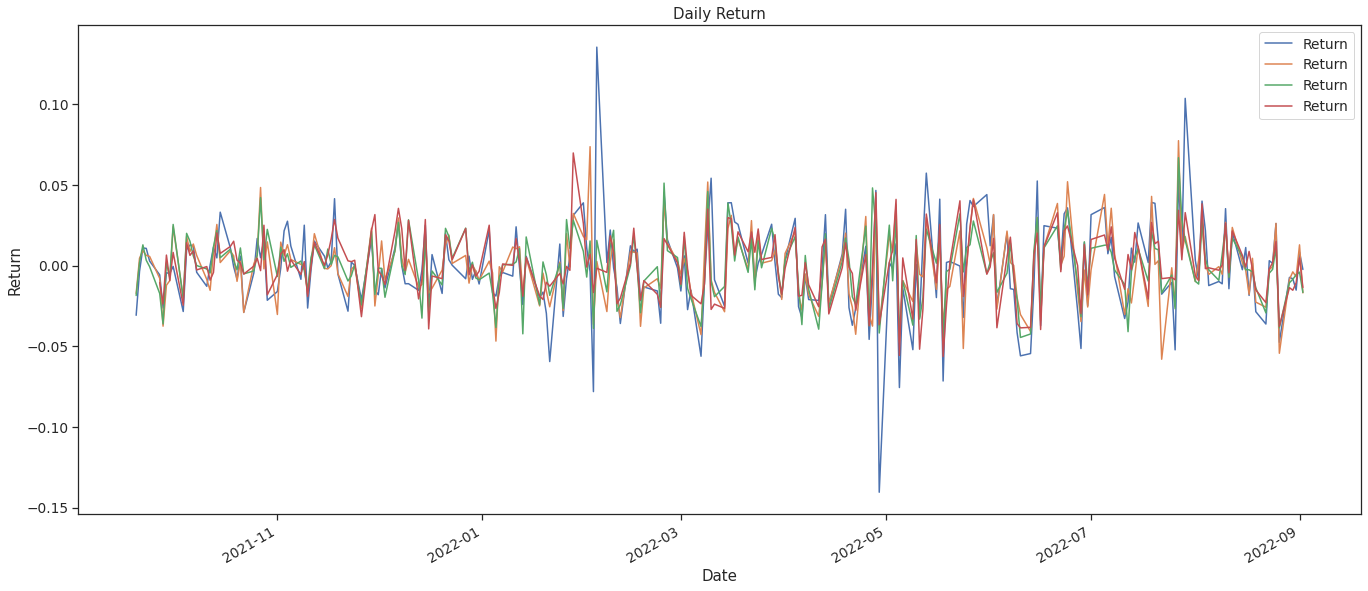

In [279]:
amzn['Return'].plot(label='Amazon Return', figsize=(23,10))
goog['Return'].plot(label='Google Return', figsize=(23,10))
msft['Return'].plot(label='Return', figsize=(23,10))
aapl['Return'].plot(label='Return', figsize=(23,10))
plt.legend()
plt.title('Daily Return')
plt.ylabel('Return')

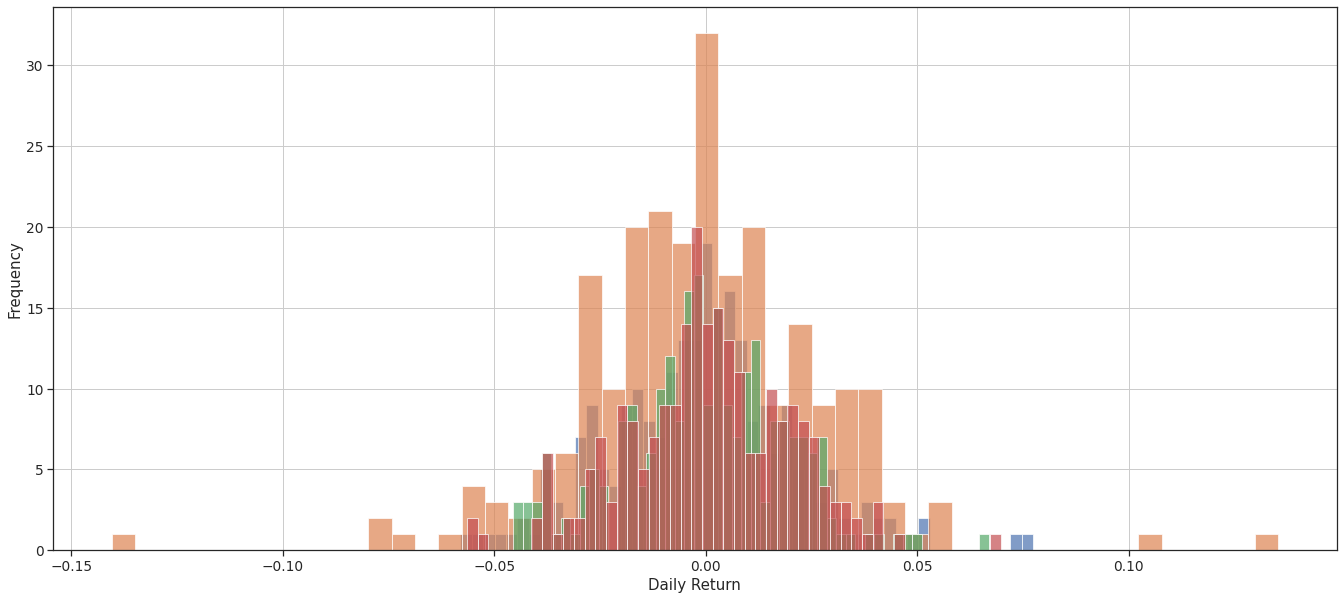

In [281]:
#Daily Return in Histogram
goog['Return'].hist(bins = 50, figsize = (23,10),alpha= 0.7) 
amzn['Return'].hist(bins = 50, figsize = (23,10), alpha= 0.7) 
msft['Return'].hist(bins = 50, figsize = (23,10), alpha= 0.7) 
aapl['Return'].hist(bins = 50, figsize = (23,10),alpha= 0.7) 
plt.xlabel("Daily Return")
plt.ylabel('Frequency')
plt.show()